In [1]:
import pandas as pd
import numpy as np
import missingno as mnso
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\CSVs\df_acidentes_sp_moto_Cyclical2.csv',sep=',')

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  object 
 12  Longitude             61669 non-null  object 
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [4]:
#cols to check misssing values
cols=['Turno', 'Jurisdição', 'Administração', 'Conservação',
       'Latitude', 'Longitude', 'Condições Climáticas', 'Iluminação',
       'Mão de direção', 'Relevo', 'Superfície da via', 'Tipo de pavimento',
       'Tipo de pista', 'Traçado', 'Tipo de Via', 'Acidente Fatal', 'Mes_sin',
       'Mes_cos', 'dias_semana_num', 'dias_semana_norm', 'dias_semana_sin',
       'dias_semana_cos', 'Hora', 'Minuto', 'horario_float', 'horario_sin',
       'horario_cos']

<AxesSubplot:>

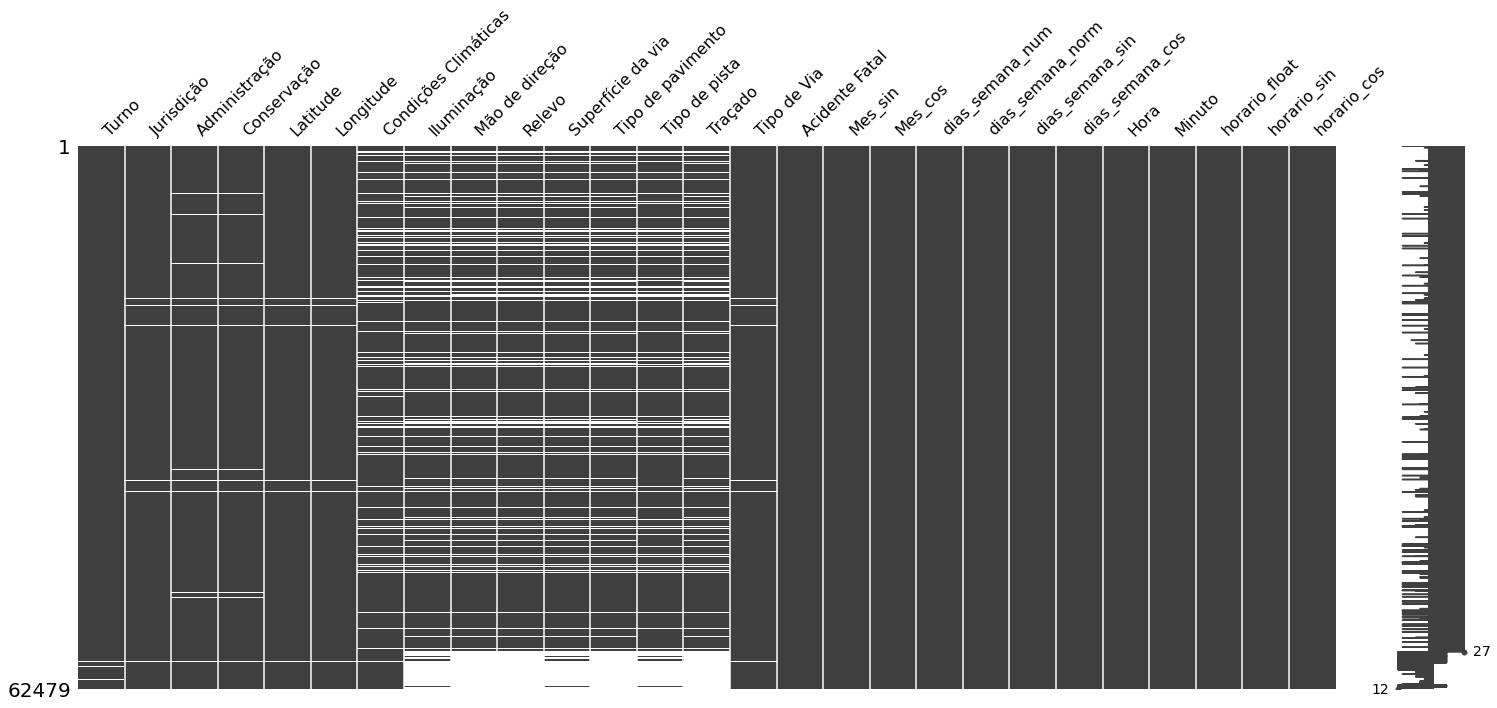

In [5]:
#matriz 
mnso.matrix(df[cols])

<AxesSubplot:>

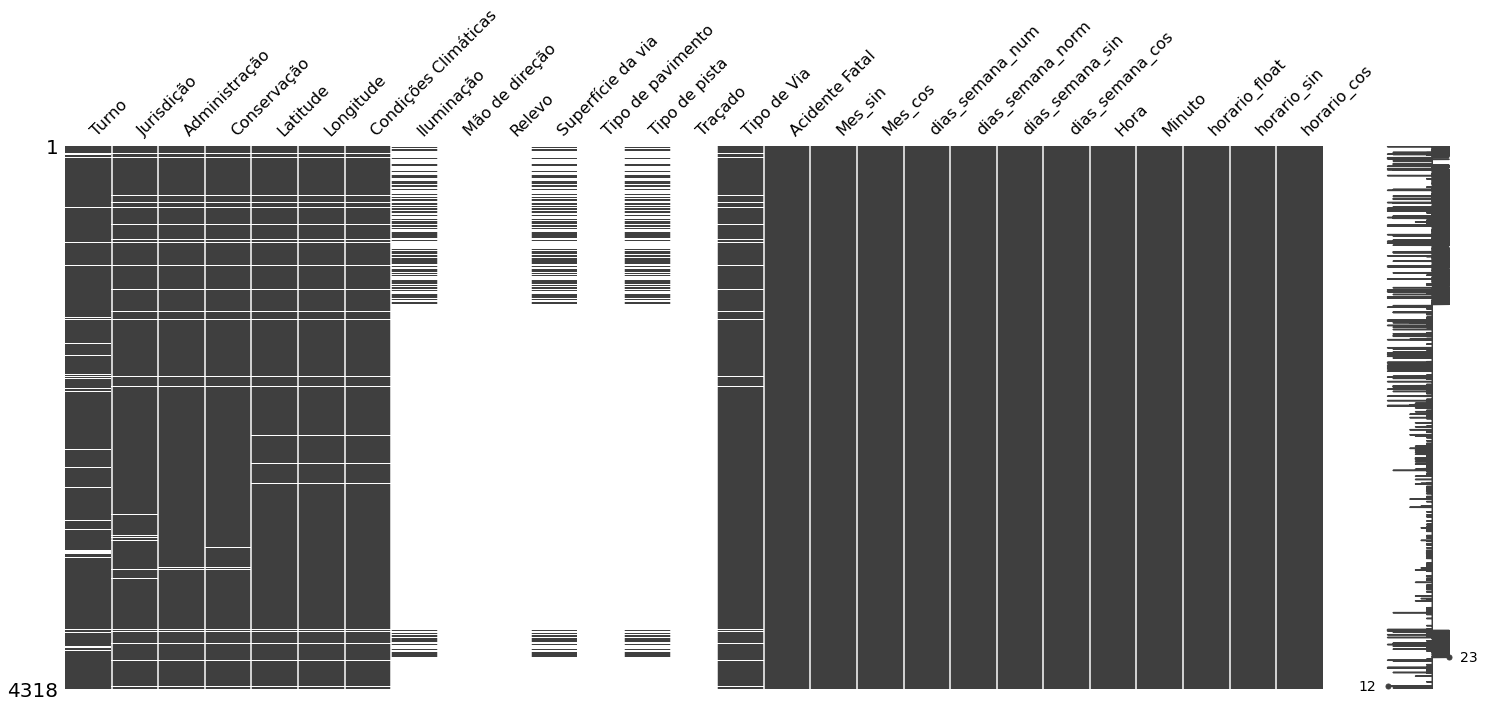

In [6]:
#matriz para fatais
mnso.matrix(df[cols].loc[df['Acidente Fatal']==1])

In [7]:
# Preenchendo valores de "Mão da direção" com base em LAT, LON

In [8]:
# Usando 5 casas decimais na latitude de longitude para ter precisao de 1m
# Usando 4 casas decimais na latitude de longitude para ter precisao de 100m
df['Latitude'] = df['Latitude'].str.replace(',','.') #susbstituindo ',' por '.'
df['Latitude'] = df['Latitude'].astype(float)#transformando pra float
df['Latitude'] = df['Latitude'].round(decimals=4)#arredondando pra 5 casas
df['Longitude'] = df['Longitude'].str.replace(',','.') #susbstituindo ',' por '.' 
df['Longitude'] = df['Longitude'].astype(float)#transformando pra float
df['Longitude'] = df['Longitude'].round(decimals=5)#arredondando pra 5 casas

In [9]:
# criando colunas lat e long como string
df['Latitude_str'] = df['Latitude'].astype(str)
df['Longitude_str'] = df['Longitude'].astype(str)

In [10]:
#criando df para virar dict e preencher valores nulos no df principal
df_mao_OK = df[['Latitude_str', 'Longitude_str','Mão de direção']].loc[df['Mão de direção'].notnull()]

In [11]:
# criando indice dummy no df_mao_OK
df_mao_OK['Index_LALO']= df_mao_OK['Latitude_str']+df_mao_OK['Longitude_str']
df_mao_OK['Index_LALO']

3        -23.5823-46.67282
4        -23.5281-46.39655
5         -23.5331-46.4294
7        -23.5675-46.54339
9        -23.7179-46.70109
               ...        
58151    -23.6709-46.70306
58152     -23.6294-46.7698
58153    -23.6924-46.76237
58154    -23.5686-46.56958
58155      -23.4225-46.791
Name: Index_LALO, Length: 49139, dtype: object

In [12]:
# criando dict
fill_dict_mao = df_mao_OK.set_index('Index_LALO')['Mão de direção'].to_dict()

In [13]:
# criando indice dummy no df principal também
df['Index_LALO']= df['Latitude_str']+df['Longitude_str']
df['Index_LALO']

0         -23.5059-46.3962
1         -23.4831-46.4906
2         -23.5183-46.6263
3        -23.5823-46.67282
4        -23.5281-46.39655
               ...        
62474    -23.6604-46.45928
62475    -23.5552-46.84921
62476    -23.6445-46.53856
62477               nannan
62478    -23.6473-46.77898
Name: Index_LALO, Length: 62479, dtype: object

In [14]:
df.info() #mão de direção 49139

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [15]:
#usando dict map pra preencher valores nulos no df principal
df.loc[df['Mão de direção'].isnull(), 'Mão de direção'] = df['Index_LALO'].map(fill_dict_mao)

In [16]:
df.info() # para 5 casas decimai de LATLON: mão da direção 50954m, ou seja recuperamos 1815 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [17]:
# Preenchendo valores de " Tipo de Pavimento" com base em LAT, LON

In [18]:
#criando df para virar dict e preencher valores nulos no df principal
df_pavimento_OK = df[['Latitude_str', 'Longitude_str','Tipo de pavimento']].loc[df['Tipo de pavimento'].notnull()]

In [19]:
# criando indice dummy no df_pavimento_OK
df_pavimento_OK['Index_LALO']= df_pavimento_OK['Latitude_str']+df_pavimento_OK['Longitude_str']
df_pavimento_OK['Index_LALO']

3        -23.5823-46.67282
4        -23.5281-46.39655
5         -23.5331-46.4294
7        -23.5675-46.54339
9        -23.7179-46.70109
               ...        
58151    -23.6709-46.70306
58152     -23.6294-46.7698
58153    -23.6924-46.76237
58154    -23.5686-46.56958
58155      -23.4225-46.791
Name: Index_LALO, Length: 49140, dtype: object

In [20]:
# criando dict
fill_dict_pav = df_pavimento_OK.set_index('Index_LALO')['Tipo de pavimento'].to_dict()

In [21]:
df.info() #tipo de pavimento 49140

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [22]:
#usando dict map pra preencher valores nulos no df principal
df.loc[df['Tipo de pavimento'].isnull(), 'Tipo de pavimento'] = df['Index_LALO'].map(fill_dict_pav)


In [23]:
df.info() # para 5 casas decimai de LATLON: 50955m, ou seja recuperamos 1815 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [24]:
# Preenchendo valores de " Tipo de Pista" com base em LAT, LON

In [25]:
#criando df para virar dict e preencher valores nulos no df principal
df_pista_OK = df[['Latitude_str', 'Longitude_str','Tipo de pista']].loc[df['Tipo de pista'].notnull()]
# criando indice dummy no df_pista_OK
df_pista_OK['Index_LALO']= df_pista_OK['Latitude_str']+df_pista_OK['Longitude_str']

In [26]:
# criando dict
fill_dict_pista = df_pista_OK.set_index('Index_LALO')['Tipo de pista'].to_dict()

In [27]:
df.info() #tipo de pista 51203

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [28]:
#usando dict map pra preencher valores nulos no df principal
df.loc[df['Tipo de pista'].isnull(), 'Tipo de pista'] = df['Index_LALO'].map(fill_dict_pista)

In [29]:
df.info() # para 5 casas decimai de LATLON: tipo de pista 52992, ou seja, recuperamos 1789 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [30]:
# Preenchendo valores de " Relevo" com base em LAT, LON

In [31]:
#criando df para virar dict e preencher valores nulos no df principal
df_relevo_OK = df[['Latitude_str', 'Longitude_str','Relevo']].loc[df['Relevo'].notnull()]
# criando indice dummy no df_relevo_OK
df_relevo_OK['Index_LALO']= df_relevo_OK['Latitude_str']+df_relevo_OK['Longitude_str']

In [32]:
# criando dict
fill_dict_relevo = df_relevo_OK.set_index('Index_LALO')['Relevo'].to_dict()

In [33]:
df.info() #relevo 49141

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [34]:
#usando dict map pra preencher valores nulos no df principal
df.loc[df['Relevo'].isnull(), 'Relevo'] = df['Index_LALO'].map(fill_dict_relevo)

In [35]:
df.info() #  para 5 casas decimai de LATLON:relevo 50955, ou seja, recuperamos 1814 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [36]:
# Preenchendo valores de "Traçado" com base em LAT, LON

In [37]:
#criando df para virar dict e preencher valores nulos no df principal
df_traçado_OK = df[['Latitude_str', 'Longitude_str','Traçado']].loc[df['Traçado'].notnull()]
# criando indice dummy no df_Traçado_OK
df_traçado_OK['Index_LALO']= df_traçado_OK['Latitude_str']+df_traçado_OK['Longitude_str']

In [38]:
# criando dict
fill_dict_traçado = df_traçado_OK.set_index('Index_LALO')['Traçado'].to_dict()

In [39]:
df.info() #traçado 49141

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [40]:
#usando dict map pra preencher valores nulos no df principal
df.loc[df['Traçado'].isnull(), 'Traçado'] = df['Index_LALO'].map(fill_dict_traçado)

In [41]:
df.info() #  para 5 casas decimai de LATLON:traçado 50955, ou seja, recuperamos 1814 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [42]:
# Preenchendo valores de "Tipo de via" com base em LAT, LON

In [43]:
#criando df para virar dict e preencher valores nulos no df principal
df_via_OK = df[['Latitude_str', 'Longitude_str','Tipo de Via']].loc[df['Tipo de Via'].notnull()]
# criando indice dummy no df_Traçado_OK
df_via_OK['Index_LALO']= df_via_OK['Latitude_str']+df_via_OK['Longitude_str']

In [44]:
# criando dict
fill_dict_via = df_via_OK.set_index('Index_LALO')['Tipo de Via'].to_dict()

In [45]:
df.info()# Tipo de via 61691

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [46]:
#usando dict map pra preencher valores nulos no df principal
df.loc[df['Tipo de Via'].isnull(), 'Tipo de Via'] = df['Index_LALO'].map(fill_dict_via)

In [47]:
df.info()# Tipo de via 62465, recuperamos 774 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62226 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            49939 non-null  object 
 15  Mão de direção     

In [48]:
#dropando index LALO, pois não usaremos mais
df.drop(['Index_LALO','Latitude_str','Longitude_str'],axis=1,inplace=True)

In [49]:
#Preenchendo dados de "iluminação" baseado no horário do dia
df['Iluminação'] = df.groupby(['Hora'])['Iluminação'].apply(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna('Test'))
#eliminando categoria 'externa' com apenas 2 linhas
df['Iluminação'] = df['Iluminação'].apply(lambda x: x.replace('EXTERNO','LUZ SOLAR'))


In [50]:
df['Iluminação'].value_counts()

LUZ SOLAR                    40377
NOITE (VIA ILUMINADA)        19833
ENTARDECER/AMANHECER          1254
NOITE (VIA NÃO ILUMINADA)      975
TÚNEL COM ILUMINAÇÃO            35
TÚNEL SEM ILUMINAÇÃO             5
Name: Iluminação, dtype: int64

In [51]:
#preenchendo dados de Turno baseado na hora
df['Turno'] = df['Hora'].apply(lambda x: 'NOITE' if (x <24) and (x>=18) else ('TARDE' if (x<18) and (x>=12) else ('MANHA' if (x<12) and (x>=6) else 'MADRUGADA')))

In [52]:
#Superficie da via: preenhcer como seco ou molhado baseano na condição climática

In [53]:
df['Superfície da via'].value_counts()

SECA         42472
MOLHADA       6833
OUTRAS         270
OLEOSA         250
ENLAMEADA       31
INUNDADA        18
Name: Superfície da via, dtype: int64

In [54]:
# criando coluna superficie da via nova apenas baseado na condição climática
df['sup2'] = df['Condições Climáticas'].apply(lambda x: 'MOLHADA' if x=='CHUVA'  else 'SECA')
df['Superfície da via'] = df['Superfície da via'].fillna(df['sup2']) #preenchendo dados faltantes
df.drop('sup2',axis=1,inplace=True)

In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62479 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            61597 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            62479 non-null  object 
 15  Mão de direção     

<AxesSubplot:>

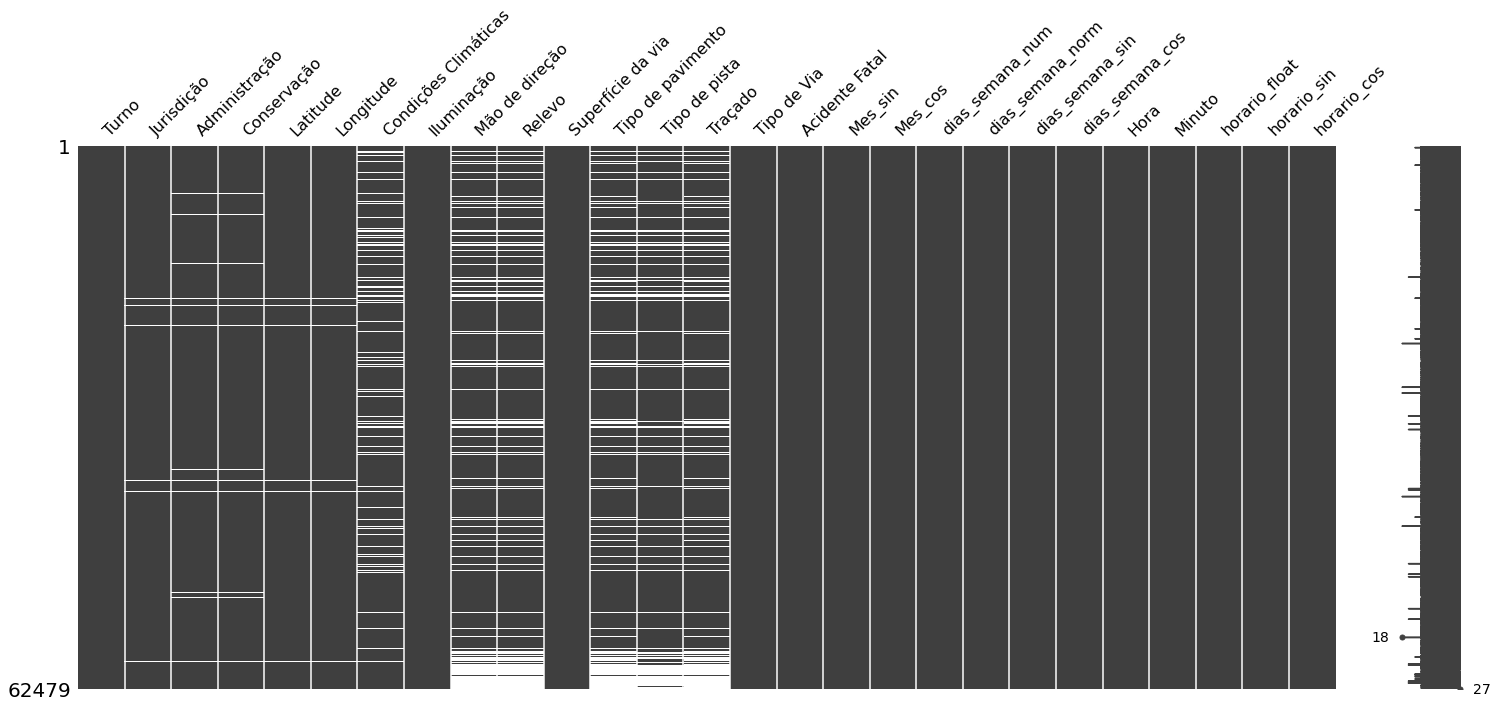

In [56]:
#matriz 
mnso.matrix(df[cols])

<AxesSubplot:>

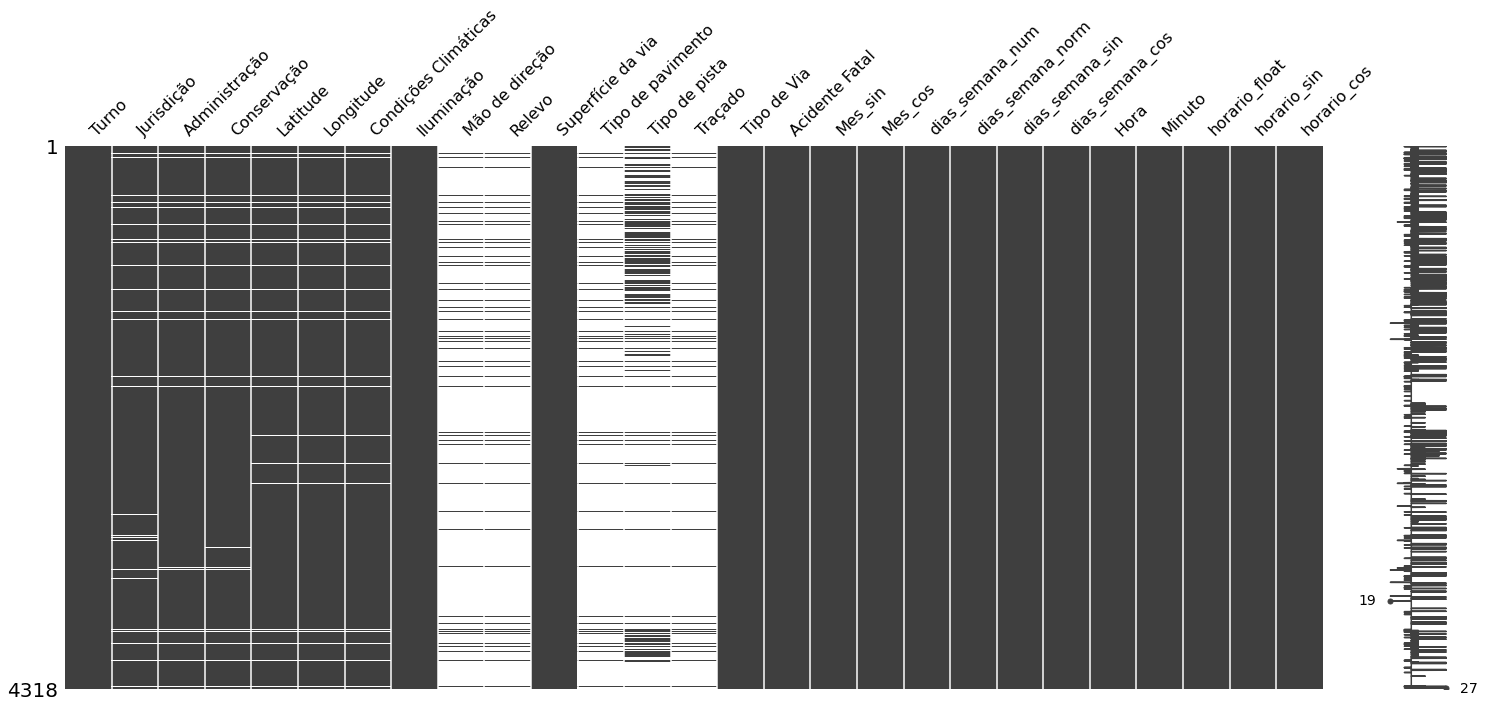

In [57]:
#matriz para fatais
mnso.matrix(df[cols].loc[df['Acidente Fatal']==1])

In [58]:
# categorais "Mão de direção", "Relevo", "Tipo de pavimento", "Tipo de pista" e "Traçado"
# criando função para preencher dados aleatórios proporcionalmente:
def replace_randomly_prop(df,column,cat,size):
    df_sample_na = df.loc[df[column].isnull(), column].sample(size).copy()

    for i in df_sample_na.index:
        df.loc[df.index == i,column] = cat


In [59]:
#Para traçado 

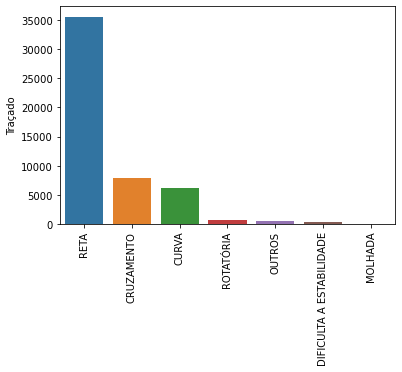

In [60]:
sns.barplot(x=df['Traçado'].value_counts().index, y=df['Traçado'].value_counts())
plt.xticks(rotation=90);


In [61]:
# Transformando as categorias "Outros", "Dificulta Estab" e "Molhada" em NaN
def correct(x):
    if x=='MOLHADA':
        x=np.NaN
    if x=='DIFICULTA A ESTABILIDADE':
        x=np.NaN
    if x=='OUTROS':
        x=np.NaN
    return x
df['Traçado'] = df['Traçado'].apply(lambda x: correct(x))

In [62]:
# proporção de dados no dataset para 'Traçado' (%)
print(round(df['Traçado'].value_counts()/df['Traçado'].count()*100,2))

RETA          70.80
CRUZAMENTO    15.63
CURVA         12.28
ROTATÓRIA      1.30
Name: Traçado, dtype: float64


In [63]:
# numeor e prop da NaNs
print('Valores nulos:',df['Traçado'].isnull().sum())
print('Proporção total de nulos:',round(df['Traçado'].isnull().sum()*100/len(df),2),'%')

Valores nulos: 12147
Proporção total de nulos: 19.44 %


In [64]:
# para preencher os dados proporcionalmente, teremos que tem o número de variaveis para cada categoria conforme abaixo:
round(df['Traçado'].value_counts()/df['Traçado'].count()*12147)

RETA          8600.0
CRUZAMENTO    1898.0
CURVA         1492.0
ROTATÓRIA      157.0
Name: Traçado, dtype: float64

In [65]:
# aplicando a funçao def pra preencher os valores nulos
replace_randomly_prop(df,'Traçado','RETA',8600)
replace_randomly_prop(df,'Traçado','CRUZAMENTO',1898)
replace_randomly_prop(df,'Traçado','CURVA',1492)
replace_randomly_prop(df,'Traçado','ROTATÓRIA',157)

In [66]:
#checando proporções e se ainda temos valores nulos
print(round(df['Traçado'].value_counts()/df['Traçado'].count()*100,2))
print('Valores nulos:',df['Traçado'].isnull().sum())

RETA          70.80
CRUZAMENTO    15.63
CURVA         12.28
ROTATÓRIA      1.29
Name: Traçado, dtype: float64
Valores nulos: 0


In [67]:
df['Tipo de pista'].value_counts()

DUPLA        26575
SIMPLES      14159
MULTIPLA     12365
PLANO            1
INCLINADO        1
Name: Tipo de pista, dtype: int64

In [68]:
# Transformando as categorias "inclinado" e 'plano' em NaN
def correct2(x):
    if x=='INCLINADO':
        x=np.NaN
    if x=='PLANO':
        x=np.NaN
    return x
df['Tipo de pista'] = df['Tipo de pista'].apply(lambda x: correct2(x))

In [69]:
# proporção de dados no dataset para 'Tipo de pista' (%)
print(round(df['Tipo de pista'].value_counts()/df['Tipo de pista'].count()*100,2))

DUPLA       50.05
SIMPLES     26.67
MULTIPLA    23.29
Name: Tipo de pista, dtype: float64


In [70]:
# numeor e prop da NaNs
print('Valores nulos:',df['Tipo de pista'].isnull().sum())
print('Proporção total de nulos:',round(df['Tipo de pista'].isnull().sum()*100/len(df),2),'%')

Valores nulos: 9380
Proporção total de nulos: 15.01 %


In [71]:
# para preencher os dados proporcionalmente, teremos que tem o número de variaveis para cada categoria conforme abaixo:
round(df['Tipo de pista'].value_counts()/df['Tipo de pista'].count()*9380)

DUPLA       4695.0
SIMPLES     2501.0
MULTIPLA    2184.0
Name: Tipo de pista, dtype: float64

In [72]:
# aplicando a funçao def pra preencher os valores nulos
replace_randomly_prop(df,'Tipo de pista','DUPLA',4695)
replace_randomly_prop(df,'Tipo de pista','SIMPLES',2501)
replace_randomly_prop(df,'Tipo de pista','MULTIPLA',2184)


In [73]:
#checando proporções e se ainda temos valores nulos
print(round(df['Tipo de pista'].value_counts()/df['Tipo de pista'].count()*100,2))
print('Valores nulos:',df['Tipo de pista'].isnull().sum())

DUPLA       50.05
SIMPLES     26.66
MULTIPLA    23.29
Name: Tipo de pista, dtype: float64
Valores nulos: 0


In [74]:
df['Tipo de pavimento'].value_counts()

ASFALTO           50504
CONCRETO            275
PARALELEPÍPEDO      144
TERRA                74
OUTROS               44
CASCALHO             22
PONTE                 1
Name: Tipo de pavimento, dtype: int64

In [75]:
# Transformando as categorias em NaN
def correct3(x):
    if x=='PONTE':
        x=np.NaN
    if x=='OUTROS':
        x=np.NaN
    return x
df['Tipo de pavimento'] = df['Tipo de pavimento'].apply(lambda x: correct3(x))

In [76]:
# proporção de dados no dataset  (%)
print(round(df['Tipo de pavimento'].value_counts()/df['Tipo de pavimento'].count()*100,2))

ASFALTO           98.99
CONCRETO           0.54
PARALELEPÍPEDO     0.28
TERRA              0.15
CASCALHO           0.04
Name: Tipo de pavimento, dtype: float64


In [77]:
# numeor e prop da NaNs
print('Valores nulos:',df['Tipo de pavimento'].isnull().sum())
print('Proporção total de nulos:',round(df['Tipo de pavimento'].isnull().sum()*100/len(df),2),'%')

Valores nulos: 11460
Proporção total de nulos: 18.34 %


In [78]:
# para preencher os dados proporcionalmente, teremos que tem o número de variaveis para cada categoria conforme abaixo:
round(df['Tipo de pavimento'].value_counts()/df['Tipo de pavimento'].count()*11460)

ASFALTO           11344.0
CONCRETO             62.0
PARALELEPÍPEDO       32.0
TERRA                17.0
CASCALHO              5.0
Name: Tipo de pavimento, dtype: float64

In [79]:
# aplicando a funçao def pra preencher os valores nulos
replace_randomly_prop(df,'Tipo de pavimento','ASFALTO',11344)
replace_randomly_prop(df,'Tipo de pavimento','CONCRETO',62)
replace_randomly_prop(df,'Tipo de pavimento','PARALELEPÍPEDO',32)
replace_randomly_prop(df,'Tipo de pavimento','TERRA',17)
replace_randomly_prop(df,'Tipo de pavimento','CASCALHO',5)

In [80]:
#checando proporções e se ainda temos valores nulos
print(round(df['Tipo de pavimento'].value_counts()/df['Tipo de pavimento'].count()*100,2))
print('Valores nulos:',df['Tipo de pavimento'].isnull().sum())

ASFALTO           98.99
CONCRETO           0.54
PARALELEPÍPEDO     0.28
TERRA              0.15
CASCALHO           0.04
Name: Tipo de pavimento, dtype: float64
Valores nulos: 0


In [81]:
df['Mão de direção'].value_counts()

DUPLA    28316
ÚNICA    22747
Name: Mão de direção, dtype: int64

In [82]:
# proporção de dados no dataset  (%)
print(round(df['Mão de direção'].value_counts()/df['Mão de direção'].count()*100,2))

DUPLA    55.45
ÚNICA    44.55
Name: Mão de direção, dtype: float64


In [83]:
# numeor e prop da NaNs
print('Valores nulos:',df['Mão de direção'].isnull().sum())
print('Proporção total de nulos:',round(df['Mão de direção'].isnull().sum()*100/len(df),2),'%')

Valores nulos: 11416
Proporção total de nulos: 18.27 %


In [84]:
# para preencher os dados proporcionalmente, teremos que tem o número de variaveis para cada categoria conforme abaixo:
round(df['Mão de direção'].value_counts()/df['Mão de direção'].count()*11416)

DUPLA    6331.0
ÚNICA    5085.0
Name: Mão de direção, dtype: float64

In [85]:
# aplicando a funçao def pra preencher os valores nulos
replace_randomly_prop(df,'Mão de direção','DUPLA',6331)
replace_randomly_prop(df,'Mão de direção','ÚNICA',5085)

In [86]:
#checando proporções e se ainda temos valores nulos
print(round(df['Mão de direção'].value_counts()/df['Mão de direção'].count()*100,2))
print('Valores nulos:',df['Mão de direção'].isnull().sum())

DUPLA    55.45
ÚNICA    44.55
Name: Mão de direção, dtype: float64
Valores nulos: 0


In [87]:
df['Relevo'].value_counts()

PLANO        37540
INCLINADO    13087
LOMBADA        435
ASFALTO          2
Name: Relevo, dtype: int64

In [88]:
# Transformando as categorias em NaN
def correct4(x):
    if x=='ASFALTO':
        x=np.NaN
    return x
df['Relevo'] = df['Relevo'].apply(lambda x: correct4(x))

In [89]:
# proporção de dados no dataset  (%)
print(round(df['Relevo'].value_counts()/df['Relevo'].count()*100,2))

PLANO        73.52
INCLINADO    25.63
LOMBADA       0.85
Name: Relevo, dtype: float64


In [90]:
# numeor e prop da NaNs
print('Valores nulos:',df['Relevo'].isnull().sum())
print('Proporção total de nulos:',round(df['Relevo'].isnull().sum()*100/len(df),2),'%')

Valores nulos: 11417
Proporção total de nulos: 18.27 %


In [91]:
# para preencher os dados proporcionalmente, teremos que tem o número de variaveis para cada categoria conforme abaixo:
round(df['Relevo'].value_counts()/df['Relevo'].count()*11417)

PLANO        8394.0
INCLINADO    2926.0
LOMBADA        97.0
Name: Relevo, dtype: float64

In [92]:
# aplicando a funçao def pra preencher os valores nulos
replace_randomly_prop(df,'Relevo','PLANO',8394)
replace_randomly_prop(df,'Relevo','INCLINADO',2926)
replace_randomly_prop(df,'Relevo','LOMBADA',97)


In [93]:
#checando proporções e se ainda temos valores nulos
print(round(df['Relevo'].value_counts()/df['Relevo'].count()*100,2))
print('Valores nulos:',df['Relevo'].isnull().sum())

PLANO        73.52
INCLINADO    25.63
LOMBADA       0.85
Name: Relevo, dtype: float64
Valores nulos: 0


In [94]:
df['Jurisdição'].value_counts()

MUNICIPAL    53504
ESTADUAL      6579
FEDERAL       1514
Name: Jurisdição, dtype: int64

In [95]:
# proporção de dados no dataset  (%)
print(round(df['Jurisdição'].value_counts()/df['Jurisdição'].count()*100,2))

MUNICIPAL    86.86
ESTADUAL     10.68
FEDERAL       2.46
Name: Jurisdição, dtype: float64


In [96]:
# numeor e prop da NaNs
print('Valores nulos:',df['Jurisdição'].isnull().sum())
print('Proporção total de nulos:',round(df['Jurisdição'].isnull().sum()*100/len(df),2),'%')

Valores nulos: 882
Proporção total de nulos: 1.41 %


In [97]:
# para preencher os dados proporcionalmente, teremos que tem o número de variaveis para cada categoria conforme abaixo:
round(df['Jurisdição'].value_counts()/df['Jurisdição'].count()*882)

MUNICIPAL    766.0
ESTADUAL      94.0
FEDERAL       22.0
Name: Jurisdição, dtype: float64

In [98]:
# aplicando a funçao def pra preencher os valores nulos
replace_randomly_prop(df,'Jurisdição','MUNICIPAL',766)
replace_randomly_prop(df,'Jurisdição','ESTADUAL',94)
replace_randomly_prop(df,'Jurisdição','FEDERAL',22)


In [99]:
#checando proporções e se ainda temos valores nulos
print(round(df['Jurisdição'].value_counts()/df['Jurisdição'].count()*100,2))
print('Valores nulos:',df['Jurisdição'].isnull().sum())

MUNICIPAL    86.86
ESTADUAL     10.68
FEDERAL       2.46
Name: Jurisdição, dtype: float64
Valores nulos: 0


variáveis preenchidas aleatóriamente!

<AxesSubplot:>

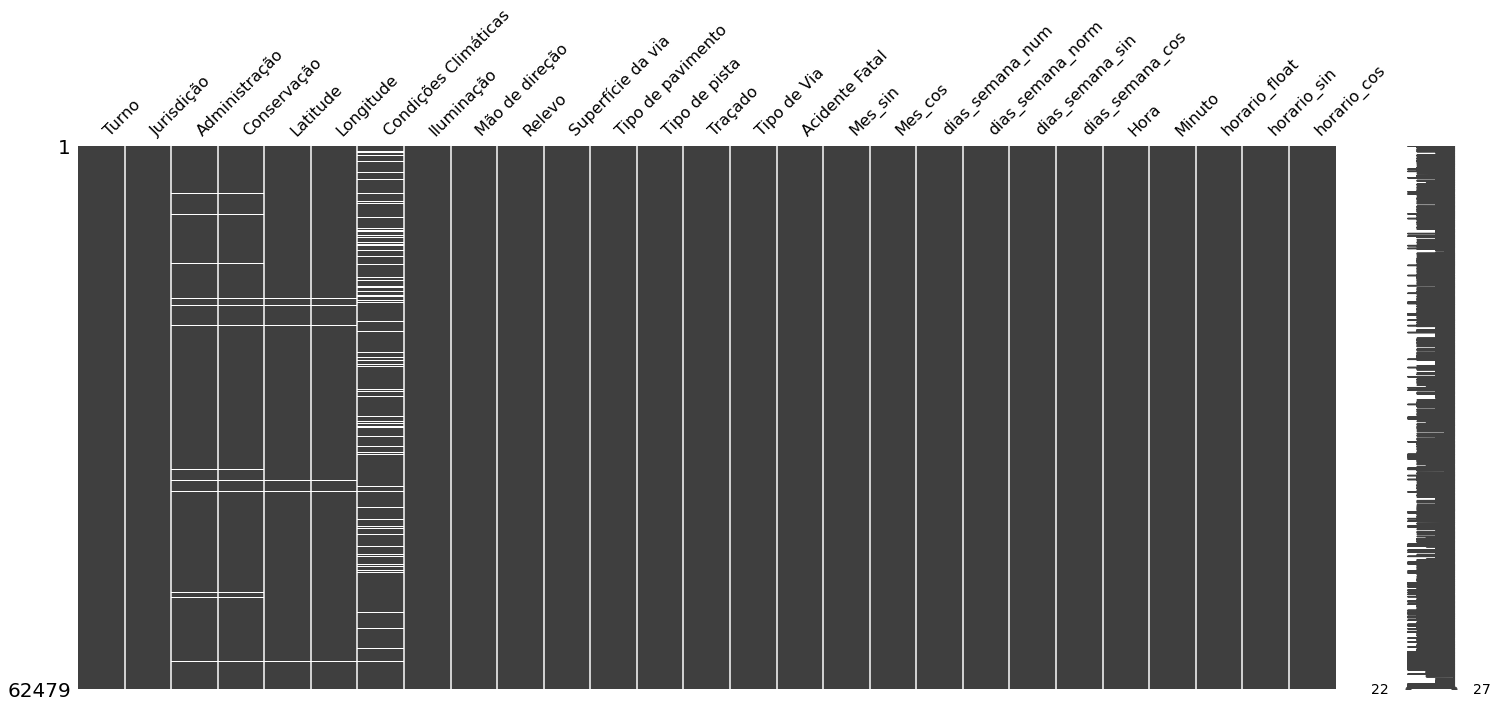

In [100]:
mnso.matrix(df[cols])

<AxesSubplot:>

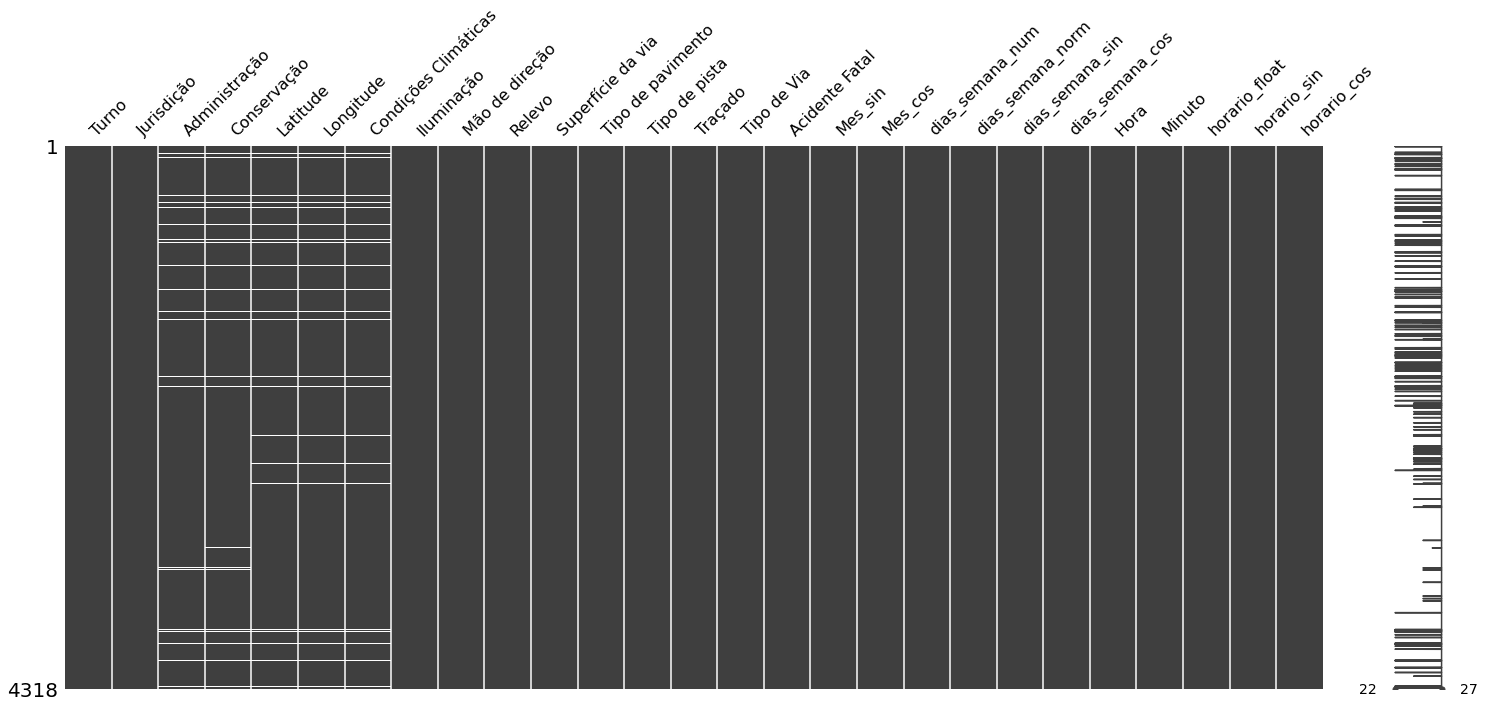

In [101]:
#matriz para fatais
mnso.matrix(df[cols].loc[df['Acidente Fatal']==1])

única coisa que poderiamos ter feito é preencher dados de condição climática para acidentes não fatais....porém eram muitos dados e a API tem limite diário. Porém se necessário podemos voltar e fazer depois

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   62479 non-null  int64  
 1   Mes                   62479 non-null  int64  
 2   Dia                   62479 non-null  int64  
 3   Dia da Semana         62479 non-null  object 
 4   Turno                 62479 non-null  object 
 5   Município             62479 non-null  object 
 6   Logradouro            61653 non-null  object 
 7   Numero/KM             57775 non-null  object 
 8   Jurisdição            62479 non-null  object 
 9   Administração         61077 non-null  object 
 10  Conservação           61076 non-null  object 
 11  Latitude              61669 non-null  float64
 12  Longitude             61669 non-null  float64
 13  Condições Climáticas  54374 non-null  object 
 14  Iluminação            62479 non-null  object 
 15  Mão de direção     

In [110]:
#dropando colunas que não usaremos
df.drop(['Numero/KM','Logradouro'],axis=1,inplace=True)

In [112]:
# df.dropna(subset=['Latitude','Longitude','Condições Climáticas'],inplace=True)
df.dropna(inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53235 entries, 3 to 62478
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53235 non-null  int64  
 1   Mes                   53235 non-null  int64  
 2   Dia                   53235 non-null  int64  
 3   Dia da Semana         53235 non-null  object 
 4   Turno                 53235 non-null  object 
 5   Município             53235 non-null  object 
 6   Jurisdição            53235 non-null  object 
 7   Administração         53235 non-null  object 
 8   Conservação           53235 non-null  object 
 9   Latitude              53235 non-null  float64
 10  Longitude             53235 non-null  float64
 11  Condições Climáticas  53235 non-null  object 
 12  Iluminação            53235 non-null  object 
 13  Mão de direção        53235 non-null  object 
 14  Relevo                53235 non-null  object 
 15  Superfície da via  

In [115]:
df.to_csv('C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\CSVs\df_acidentes_sp_moto_CLEAN.csv',index=False)